In [34]:
import json
import csv
import psycopg2
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from distribution_functions import get_var_by_year

In [35]:
# Connect to database
conn = psycopg2.connect(database="evictions"
                            , user='ev_user'
                            , password='alenaclairejustin'
                            , host='evictions.cuvbjnrvbddj.us-east-1.rds.amazonaws.com'
                            , port='5432'
                            , options=f'-c search_path=evictions')

cur = conn.cursor()

## Number of Evictions Options

In [36]:
# 2001 output
output_2001 = get_var_by_year('evictions', 2001, cur)
output_2001 = pd.DataFrame.from_records(output_2001)
series_2001 = output_2001[0]

# 2016 output
output_2016 = get_var_by_year('evictions', 2016, cur)
output_2016 = pd.DataFrame.from_records(output_2016)
series_2016 = output_2016[0]

In [51]:
series_2016.describe()

count    179825.000000
mean          2.402129
std          24.125610
min           0.000000
25%           0.000000
50%           1.040000
75%           2.970000
max        9100.000000
Name: 0, dtype: float64

In [53]:
series_2016[series_2016==0].describe()

count    62321.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: 0, dtype: float64

In [54]:
62321/179825

0.3465647156958154

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


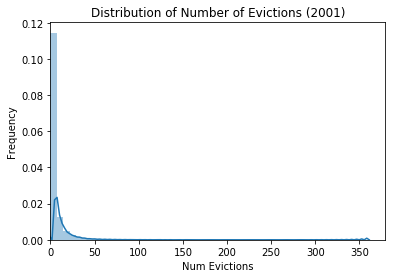

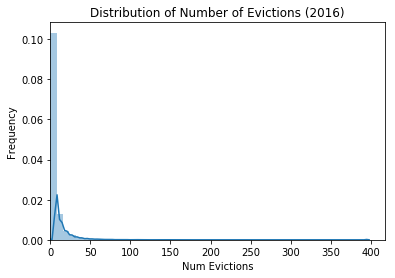

In [37]:
# Full distribution, distplot
# 2011
plt.figure(figsize=(6,4))
g = sns.distplot(series_2001[~series_2001.isnull()])
plt.title('Distribution of Number of Evictions (2001)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, None)
plt.show()

# 2016
plt.figure(figsize=(6,4))
g = sns.distplot(series_2016[~series_2016.isnull()])
plt.title('Distribution of Number of Evictions (2016)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, None)
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


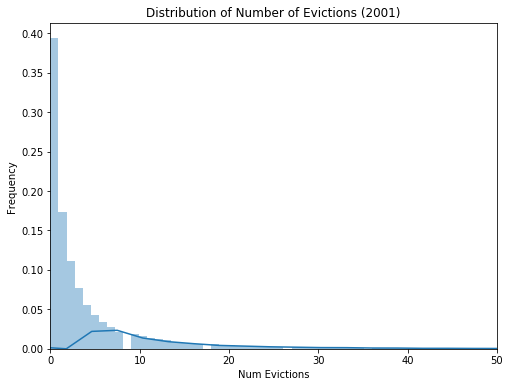

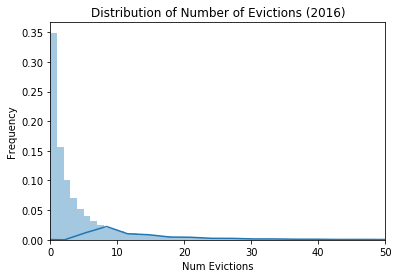

In [38]:
# Truncated, distplot
# 2011
plt.figure(figsize=(8,6))
g = sns.distplot(series_2001[~series_2001.isnull()], bins = 400)
plt.title('Distribution of Number of Evictions (2001)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, 50)
plt.show()

# 2016
plt.figure(figsize=(6,4))
g = sns.distplot(series_2016[~series_2016.isnull()], bins = 400)
plt.title('Distribution of Number of Evictions (2016)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, 50)
plt.show()

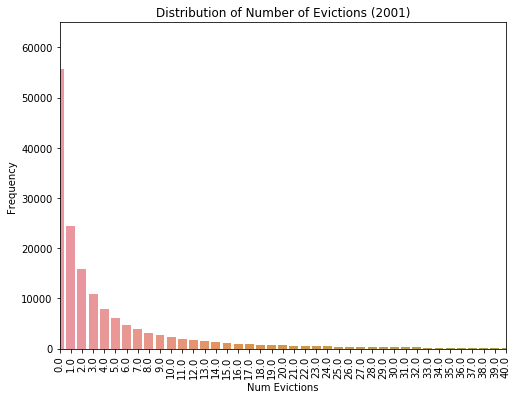

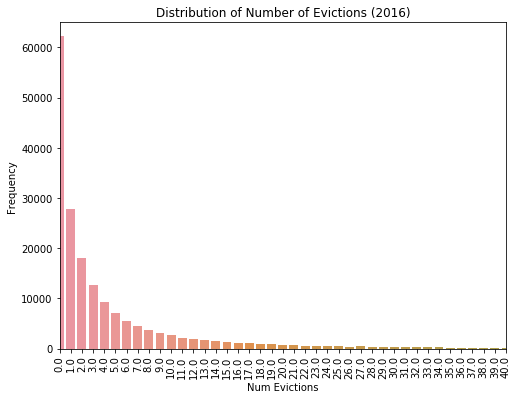

In [39]:
# Truncated, countplot
#2001
plt.figure(figsize=(8,6))
g = sns.countplot(series_2001[~series_2001.isnull()])
plt.title('Distribution of Number of Evictions (2001)')
plt.xlabel('Num Evictions')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Frequency')
plt.ylim(0,65000)
plt.xlim(0, 40)
plt.show()

#2016
plt.figure(figsize=(8,6))
g = sns.countplot(series_2016[~series_2016.isnull()])
plt.title('Distribution of Number of Evictions (2016)')
plt.xlabel('Num Evictions')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Frequency')
plt.ylim(0,65000)
plt.xlim(0, 40)
plt.show()

In [40]:
series_2001.sum()

754632.0

In [41]:
series_2016.sum()

898329.0

## Number of Eviction Filings

In [42]:
variable = 'eviction_filings'

# 2001 output
output_2001 = get_var_by_year(variable, 2001, cur)
output_2001 = pd.DataFrame.from_records(output_2001)
series_2001 = output_2001[0]

# 2016 output
output_2016 = get_var_by_year(variable, 2016, cur)
output_2016 = pd.DataFrame.from_records(output_2016)
series_2016 = output_2016[0]

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


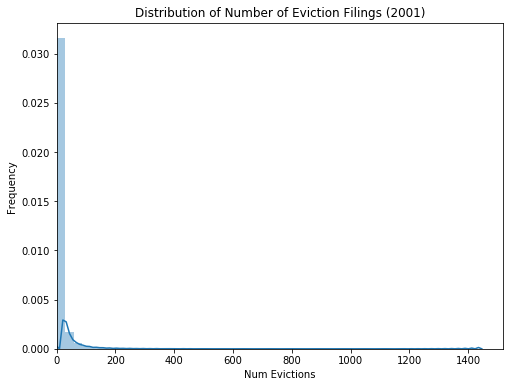

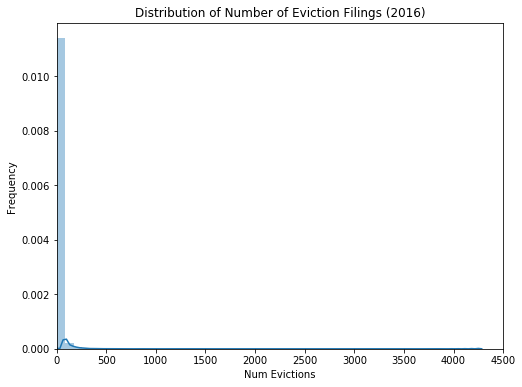

In [43]:
# Full distribution, distplot
# 2011
plt.figure(figsize=(8,6))
g = sns.distplot(series_2001[~series_2001.isnull()])
plt.title('Distribution of Number of Eviction Filings (2001)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, None)
plt.show()

# 2016
plt.figure(figsize=(8,6))
g = sns.distplot(series_2016[~series_2016.isnull()])
plt.title('Distribution of Number of Eviction Filings (2016)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, None)
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


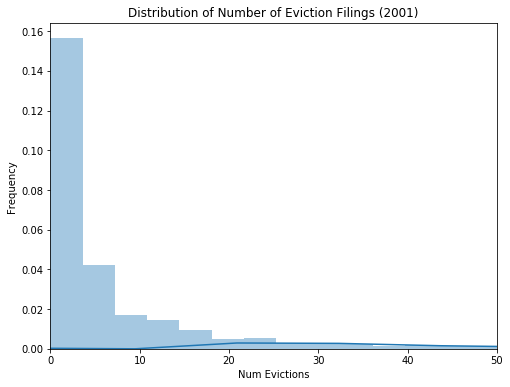

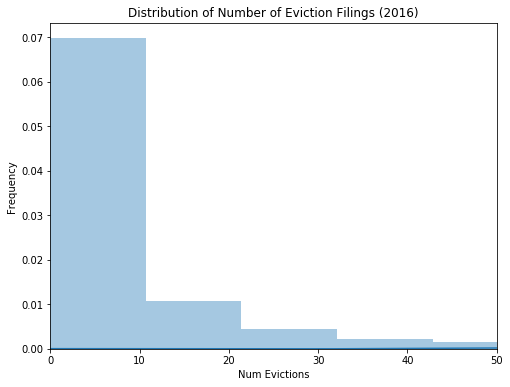

In [44]:
# Truncated, distplot
# 2011
plt.figure(figsize=(8,6))
g = sns.distplot(series_2001[~series_2001.isnull()], bins = 400)
plt.title('Distribution of Number of Eviction Filings (2001)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, 50)
plt.show()

# 2016
plt.figure(figsize=(8,6))
g = sns.distplot(series_2016[~series_2016.isnull()], bins = 400)
plt.title('Distribution of Number of Eviction Filings (2016)')
plt.xlabel('Num Evictions')
plt.ylabel('Frequency')
plt.xlim(0, 50)
plt.show()

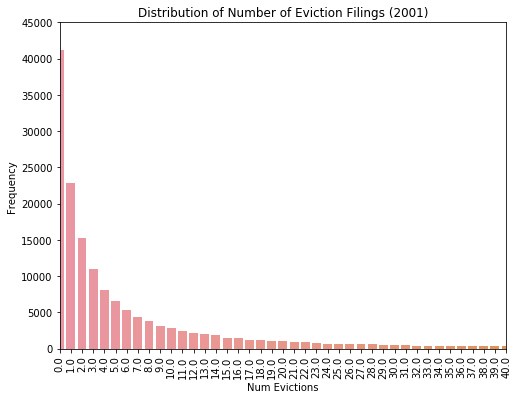

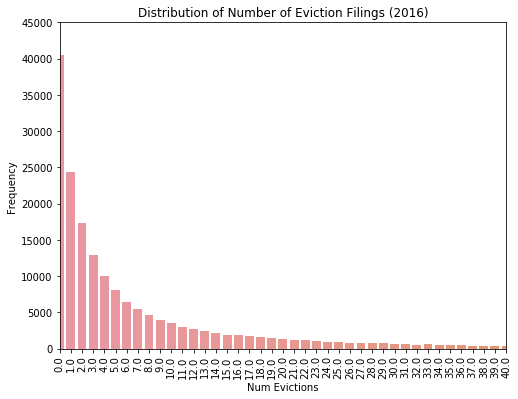

In [45]:
# Truncated, countplot
#2001
plt.figure(figsize=(8,6))
g = sns.countplot(series_2001[~series_2001.isnull()])
plt.title('Distribution of Number of Eviction Filings (2001)')
plt.xlabel('Num Evictions')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Frequency')
plt.ylim(0,45000)
plt.xlim(0, 40)
plt.show()

#2016
plt.figure(figsize=(8,6))
g = sns.countplot(series_2016[~series_2016.isnull()])
plt.title('Distribution of Number of Eviction Filings (2016)')
plt.xlabel('Num Evictions')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Frequency')
plt.ylim(0,45000)
plt.xlim(0, 40)
plt.show()

## Eviction Rates

In [46]:
variable = 'eviction_rate'

# 2001 output
output_2001 = get_var_by_year(variable, 2001, cur)
output_2001 = pd.DataFrame.from_records(output_2001)
series_2001 = output_2001[0]

# 2016 output
output_2016 = get_var_by_year(variable, 2016, cur)
output_2016 = pd.DataFrame.from_records(output_2016)
series_2016 = output_2016[0]

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


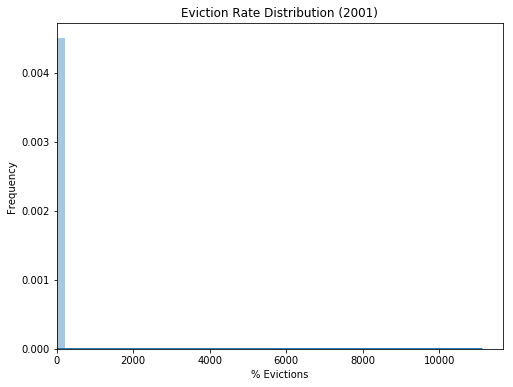

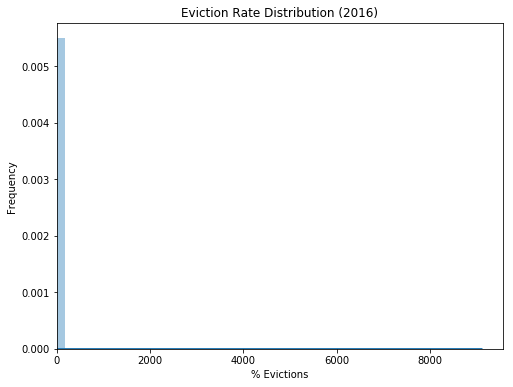

In [47]:
# Full distribution, distplot
# 2011
plt.figure(figsize=(8,6))
g = sns.distplot(series_2001[~series_2001.isnull()])
plt.title('Eviction Rate Distribution (2001)')
plt.xlabel('% Evictions')
plt.ylabel('Frequency')
plt.xlim(0, None)
plt.show()

# 2016
plt.figure(figsize=(8,6))
g = sns.distplot(series_2016[~series_2016.isnull()])
plt.title('Eviction Rate Distribution (2016)')
plt.xlabel('% Evictions')
plt.ylabel('Frequency')
plt.xlim(0, None)
plt.show()

In [48]:
# Truncated, distplot
# 2011
plt.figure(figsize=(8,6))
g = sns.distplot(series_2001[~series_2001.isnull()<10], kde=True, bins = 100)
plt.title('Eviction Rate Distribution (2001)')
plt.xlabel('% Evictions')
plt.ylabel('Frequency')
#plt.xlim(0, 10)
plt.show()

# 2016
plt.figure(figsize=(8,6))
g = sns.distplot(series_2016[~series_2016.isnull()<10], kde=True, bins = 100)
plt.title('Eviction Rate Distribution (2016)')
plt.xlabel('% Evictions')
plt.ylabel('Frequency')
#plt.xlim(0, 10)
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

## Eviction Trends Over Time

In [ ]:
cur.execute("SELECT year, sum(evictions) as ev_tot, avg(eviction_rate) " 
            +"as ev_avgrate, sum(eviction_filings) as file_tot, avg(eviction_filing_rate) as filerate_avg " 
            +"FROM evictions.blockgroup WHERE population>0 GROUP BY year;")
output = cur.fetchall()


In [ ]:
col_names = ['Year', 'Total_Evictions', 'Avg_Eviction_Rate', 
             'Total_Filings', 'Total_Eviction_Rate']
df = pd.DataFrame.from_records(output, columns = col_names).sort_values('Year')
df

In [ ]:
df.plot(x='Year', y = ['Total_Evictions', 'Total_Filings'], kind = 'line' )
plt.show()

In [ ]:
df.plot(x='Year', y = ['Avg_Eviction_Rate', 'Total_Eviction_Rate'], kind = 'line' )
plt.show()

# I think these are above 1 because of small population/multiple eviction proceedings per household... need to adjust

## Rate vs Population

In [ ]:
cur.execute("SELECT year, population, eviction_rate FROM evictions.blockgroup WHERE year=2016 and population>0;")
output = cur.fetchall()

In [ ]:
col_names = ['Year', 'Population', 'Eviction_Rate']
df = pd.DataFrame.from_records(output, columns = col_names)
df.head()

In [ ]:
df.plot(x='Population', y='Eviction_Rate', kind='scatter')
plt.ylim(0,None)
plt.show()

In [ ]:
df[df['Eviction_Rate']>100]